![](https://images.unsplash.com/photo-1630531210974-dab9b07c4eff?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)

# Installs

In [4]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

^C


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from autoviz.classify_method import data_cleaning_suggestions,data_suggestions
# from pycaret  import regression
# from sklearn.model_selection import cross_val_score

# Data Loading

In [2]:
df = pd.read_excel('D:\研究生文件记录\小论文资料汇总\实验代码\stroke_project\data.xlsx')
duplicated_features = df[df.duplicated(subset=['age', 'gender', 'left_arm', 'right_arm', 'face',
                                               'directivity', 'trajectory', 'left_leg', 'right_leg','hypertension'], keep=False)]
# 查找矛盾样本
conflicting_samples = duplicated_features.groupby(['age', 'gender', 'left_arm', 'right_arm', 'face',
                                                  'directivity', 'trajectory', 'left_leg', 'right_leg','hypertension'])['labels'].nunique()
conflicting_samples = conflicting_samples[conflicting_samples > 1]

conflicting_ids = df[df.set_index(['age', 'gender', 'left_arm', 'right_arm', 'face',
                                               'directivity', 'trajectory', 'left_leg', 'right_leg','hypertension']).index.isin(conflicting_samples.index)]['id']
# 打印矛盾样本
print("Conflicting samples found:")
print(conflicting_samples)
print("矛盾样本的 ID:", conflicting_ids.tolist())

Conflicting samples found:
Series([], Name: labels, dtype: int64)
矛盾样本的 ID: []


In [3]:
# df = pd.read_csv('D:\研究生文件记录\小论文资料汇总\实验代码\stroke_project\stroke.csv')
df = pd.read_excel('D:\研究生文件记录\小论文资料汇总\实验代码\stroke_project\data.xlsx')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            374 non-null    int64 
 1   age           374 non-null    int64 
 2   gender        374 non-null    object
 3   left_arm      374 non-null    object
 4   right_arm     374 non-null    object
 5   face          374 non-null    object
 6   directivity   374 non-null    object
 7   trajectory    374 non-null    object
 8   left_leg      374 non-null    object
 9   right_leg     374 non-null    object
 10  hypertension  374 non-null    object
 11  labels        374 non-null    object
dtypes: int64(2), object(10)
memory usage: 35.2+ KB


,id,age
count,374.000000,374.000000
mean,187.500000,57.473262
std,108.108742,14.920094
min,1.000000,11.000000
25%,94.250000,46.250000
50%,187.500000,58.000000
75%,280.750000,67.000000
max,374.000000,91.000000


In [4]:
# df.head()

In [5]:
# df.tail()

In [6]:
# df.shape

# EDA

In [7]:
df.nunique()

id              374
age              66
gender            2
left_arm          3
right_arm         3
face              3
directivity       3
trajectory        3
left_leg          3
right_leg         3
hypertension      3
labels            2
dtype: int64

In [8]:
df.drop('id', axis = 1, inplace = True)

In [9]:
df.dtypes

age              int64
gender          object
left_arm        object
right_arm       object
face            object
directivity     object
trajectory      object
left_leg        object
right_leg       object
hypertension    object
labels          object
dtype: object

In [5]:
# df['bmi'] = df['bmi'].astype(float)

# Handling Categorical Values

In [10]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender',
 'left_arm',
 'right_arm',
 'face',
 'directivity',
 'trajectory',
 'left_leg',
 'right_leg',
 'hypertension',
 'labels']

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders= {}
for col in cat_cols: 
    # Encode values in training set
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

for col in cat_cols:
    print(f"特征列 '{col}' 的编码关系:")
    for i, class_label in enumerate(label_encoders[col].classes_):
        print(f"  {class_label} -> {i}")


特征列 'gender' 的编码关系:
  female -> 0
  male -> 1
特征列 'left_arm' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'right_arm' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'face' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'directivity' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'trajectory' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'left_leg' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'right_leg' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'hypertension' 的编码关系:
  Unknown -> 0
  no -> 1
  yes -> 2
特征列 'labels' 的编码关系:
  stroke -> 0
  unstroke -> 1


In [12]:
df['labels'] = df['labels'].replace({0: 1, 1: 0})
df

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,hypertension,labels
0,67,0,2,2,1,2,2,2,1,2,1
1,56,1,2,2,2,1,1,2,2,2,1
2,66,1,2,1,1,1,1,2,2,2,1
3,51,1,2,1,1,1,1,2,1,2,1
4,71,0,2,2,1,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
369,22,1,2,2,2,2,2,2,2,1,0
370,22,0,2,2,2,2,2,2,2,1,0
371,26,1,2,2,2,2,2,2,2,1,0
372,26,0,2,2,2,2,2,2,2,1,0


# Handling Null Values

In [13]:
df.isnull().any()

age             False
gender          False
left_arm        False
right_arm       False
face            False
directivity     False
trajectory      False
left_leg        False
right_leg       False
hypertension    False
labels          False
dtype: bool

In [14]:
df.isnull().sum()

age             0
gender          0
left_arm        0
right_arm       0
face            0
directivity     0
trajectory      0
left_leg        0
right_leg       0
hypertension    0
labels          0
dtype: int64

In [15]:
df.fillna('29', inplace = True)

In [16]:
df.isnull().sum()

age             0
gender          0
left_arm        0
right_arm       0
face            0
directivity     0
trajectory      0
left_leg        0
right_leg       0
hypertension    0
labels          0
dtype: int64

In [17]:
df.isnull().any()

age             False
gender          False
left_arm        False
right_arm       False
face            False
directivity     False
trajectory      False
left_leg        False
right_leg       False
hypertension    False
labels          False
dtype: bool

# Correlation

In [18]:
df.corr()

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,hypertension,labels
age,1.000000,-0.021972,-0.088544,-0.015102,-0.096581,-0.100744,-0.037471,-0.175571,-0.062763,0.181307,0.303906
gender,-0.021972,1.000000,-0.052629,-0.082085,-0.111712,-0.053812,-0.023811,-0.053407,-0.041681,0.107110,0.216269
left_arm,-0.088544,-0.052629,1.000000,0.096941,0.170123,0.203053,0.193708,0.478109,-0.037615,-0.081293,-0.199346
right_arm,-0.015102,-0.082085,0.096941,1.000000,0.084645,0.164857,0.296374,0.004268,0.490236,-0.042562,-0.180391
face,-0.096581,-0.111712,0.170123,0.084645,1.000000,0.083106,0.174536,0.095799,0.068667,-0.039569,-0.289457
directivity,-0.100744,-0.053812,0.203053,0.164857,0.083106,1.000000,0.567654,0.172529,0.244633,-0.057771,-0.375573
trajectory,-0.037471,-0.023811,0.193708,0.296374,0.174536,0.567654,1.000000,0.194017,0.315250,-0.058305,-0.319212
left_leg,-0.175571,-0.053407,0.478109,0.004268,0.095799,0.172529,0.194017,1.000000,0.126992,-0.040877,-0.327807
right_leg,-0.062763,-0.041681,-0.037615,0.490236,0.068667,0.244633,0.315250,0.126992,1.000000,-0.104638,-0.275602
hypertension,0.181307,0.107110,-0.081293,-0.042562,-0.039569,-0.057771,-0.058305,-0.040877,-0.104638,1.000000,0.142813


In [19]:
df

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,hypertension,labels
0,67,0,2,2,1,2,2,2,1,2,1
1,56,1,2,2,2,1,1,2,2,2,1
2,66,1,2,1,1,1,1,2,2,2,1
3,51,1,2,1,1,1,1,2,1,2,1
4,71,0,2,2,1,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
369,22,1,2,2,2,2,2,2,2,1,0
370,22,0,2,2,2,2,2,2,2,1,0
371,26,1,2,2,2,2,2,2,2,1,0
372,26,0,2,2,2,2,2,2,2,1,0


# Class Distribution

In [20]:
# Count the number of instances in each class
class_counts = df['labels'].value_counts()
# class_counts = df['stroke'].value_counts()
# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
labels
1    194
0    180
Name: count, dtype: int64


In [21]:
null_percent = df.isnull().mean() * 100
nunique_percent = df.nunique() / len(df) * 100
dtypes = df.dtypes
nuniques = df.nunique()

data_cleaning_report = pd.DataFrame({
    'Nullpercent': null_percent,
    'NuniquePercent': nunique_percent,
    'dtype': dtypes,
    'Nuniques': nuniques,
    'Nulls': df.isnull().sum()
})
print(data_cleaning_report)

              Nullpercent  NuniquePercent  dtype  Nuniques  Nulls
age                   0.0       17.647059  int64        66      0
gender                0.0        0.534759  int32         2      0
left_arm              0.0        0.802139  int32         3      0
right_arm             0.0        0.802139  int32         3      0
face                  0.0        0.802139  int32         3      0
directivity           0.0        0.802139  int32         3      0
trajectory            0.0        0.802139  int32         3      0
left_leg              0.0        0.802139  int32         3      0
right_leg             0.0        0.802139  int32         3      0
hypertension          0.0        0.802139  int32         3      0
labels                0.0        0.534759  int32         2      0


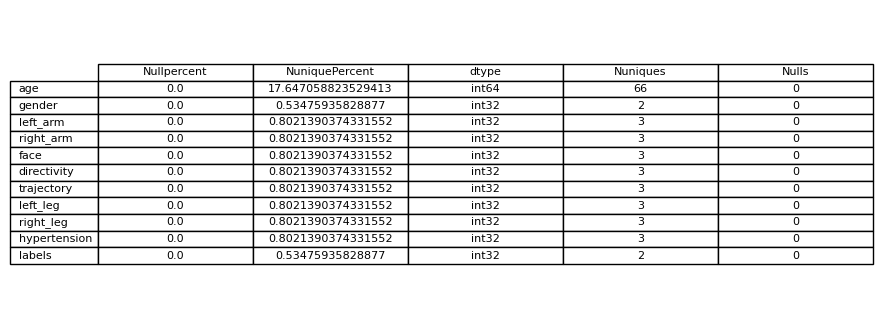

In [22]:
import matplotlib.pyplot as plt
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

table(ax, data_cleaning_report, loc='center', cellLoc='center')
plt.show()

# Visualizations

# Correlation

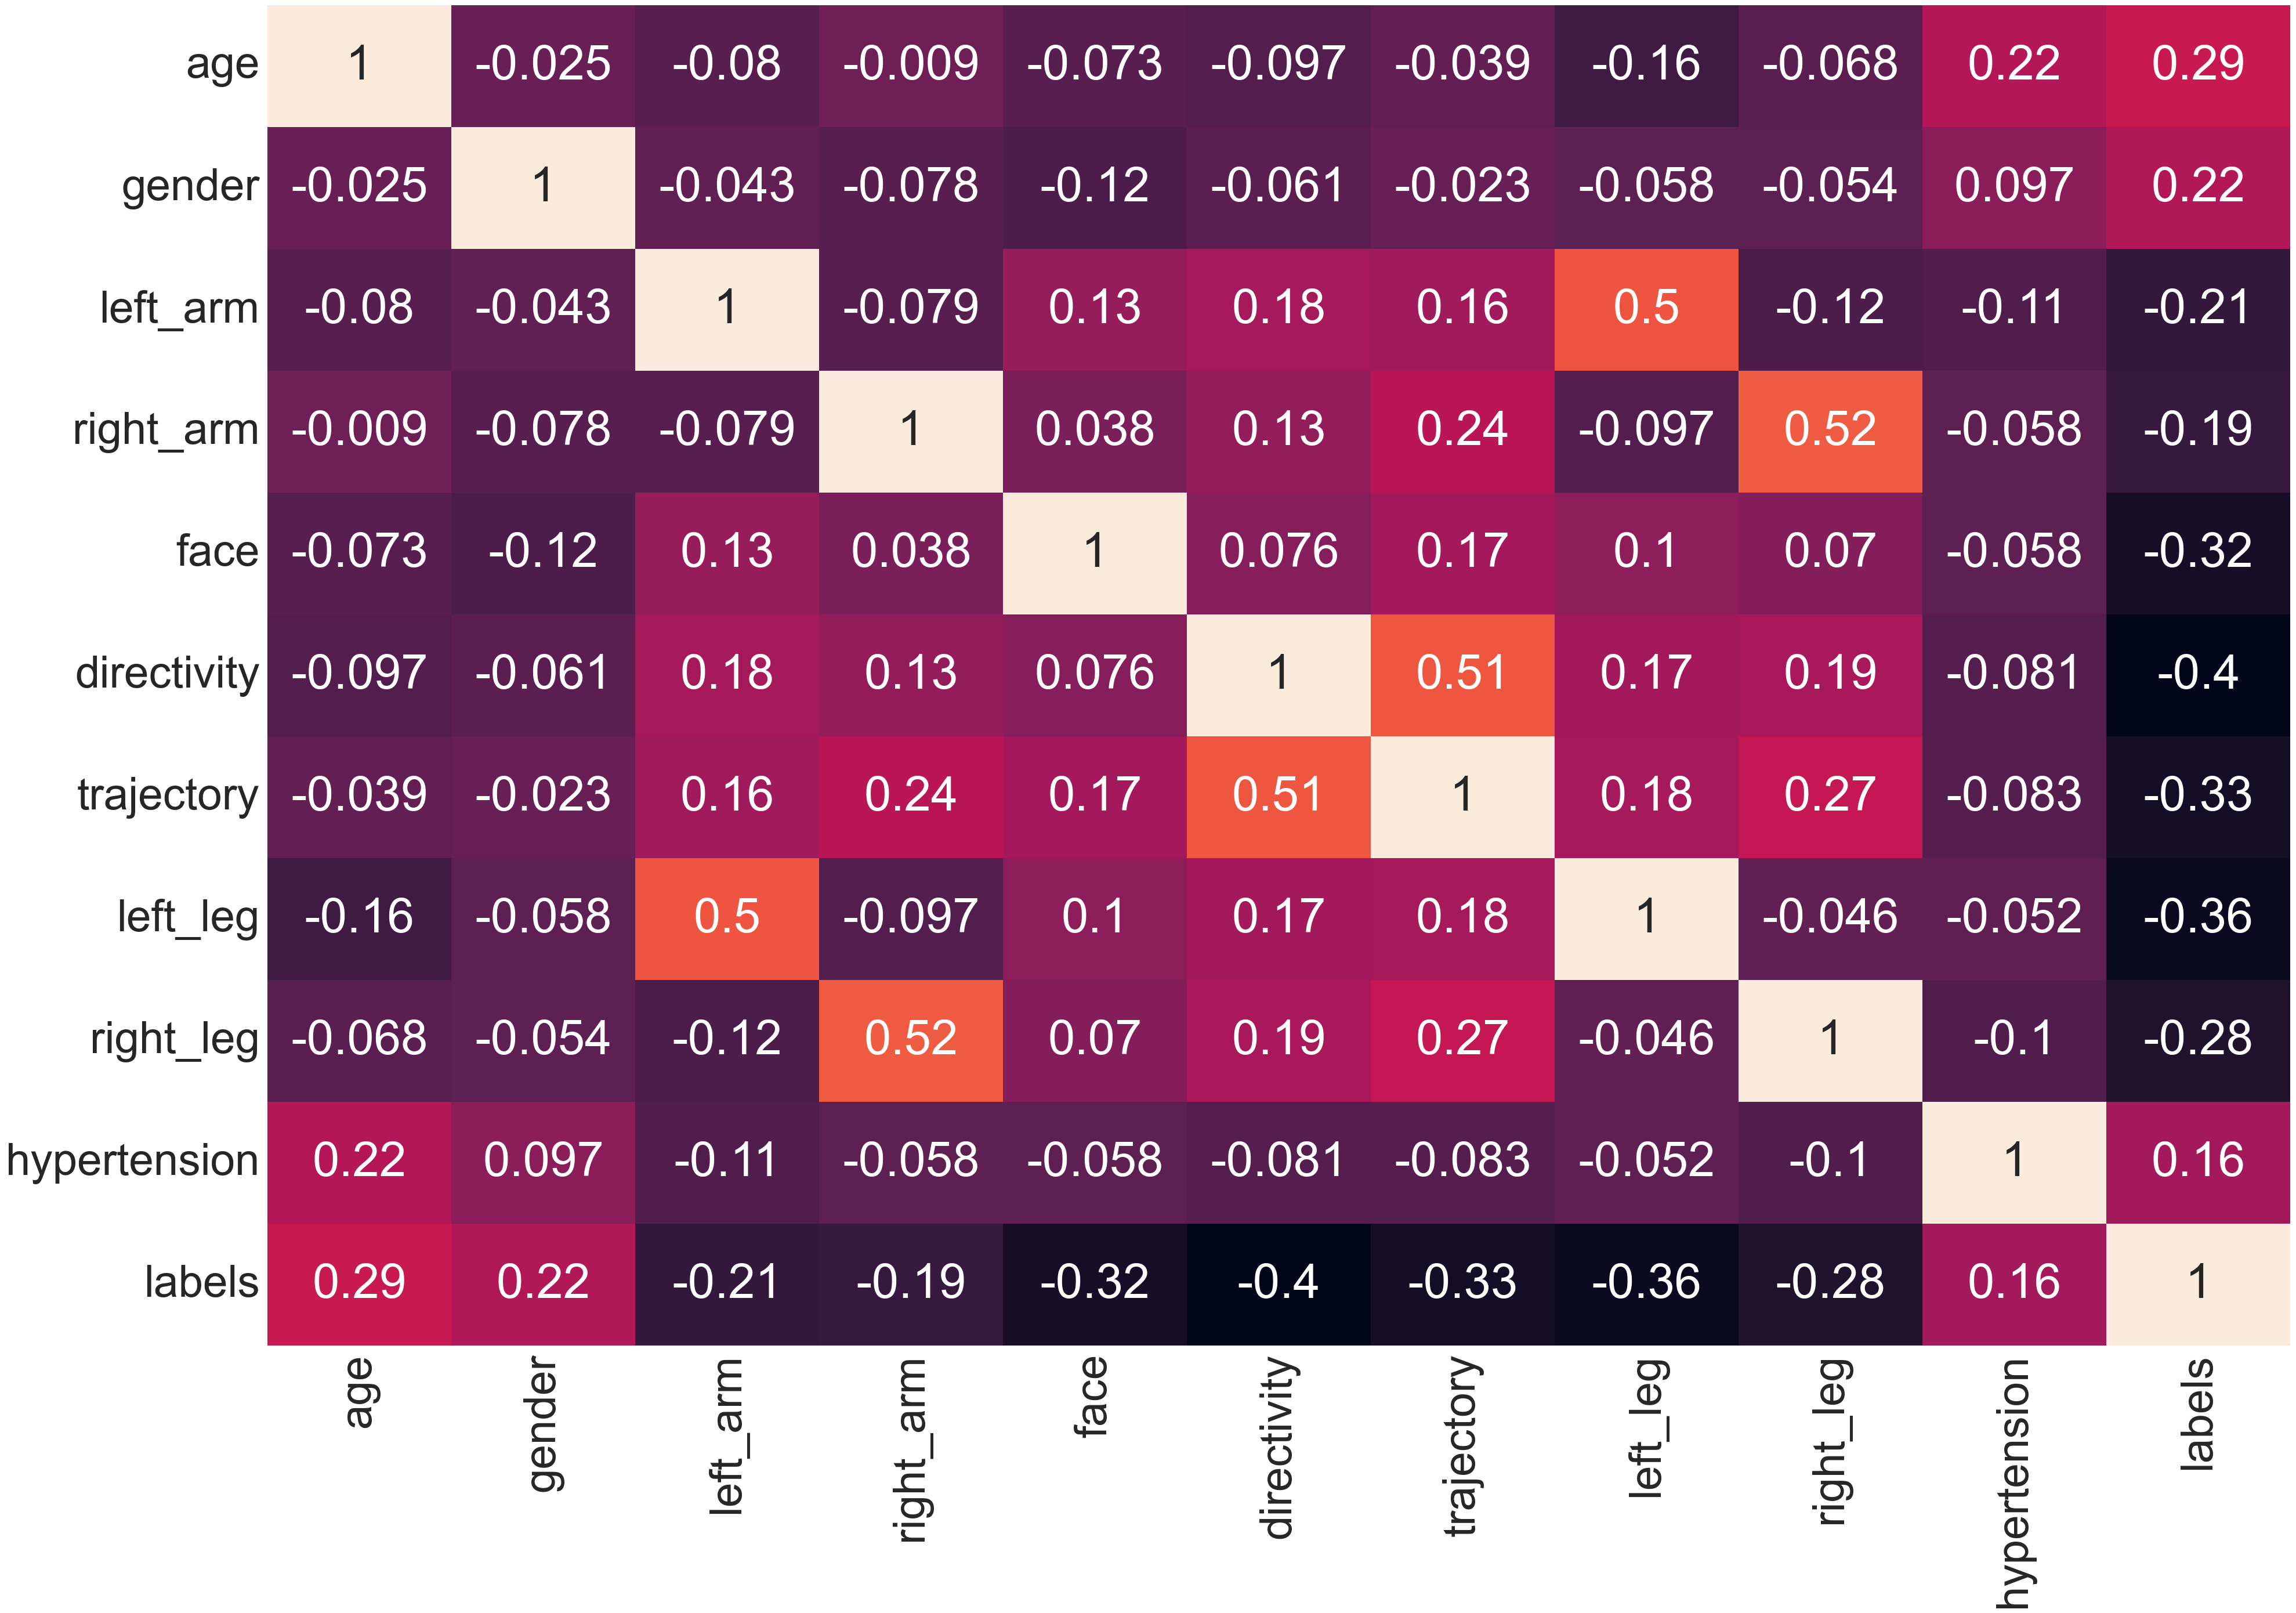

In [25]:
# 分析数据相关性
plt.figure(figsize=(45,30))
sns.set_theme(font_scale=5)
fig=sns.heatmap(df.corr(method='spearman'),annot=True, xticklabels=1, yticklabels=1, cbar = False)
plot = fig.get_figure()
plot.savefig('corr.jpg', dpi=600, bbox_inches='tight')
  #设置图例字体大小
plt.savefig('corr.svg',dpi=600,bbox_inches='tight',format="svg")

# Pair Plots

<Figure size 5000x3000 with 0 Axes>

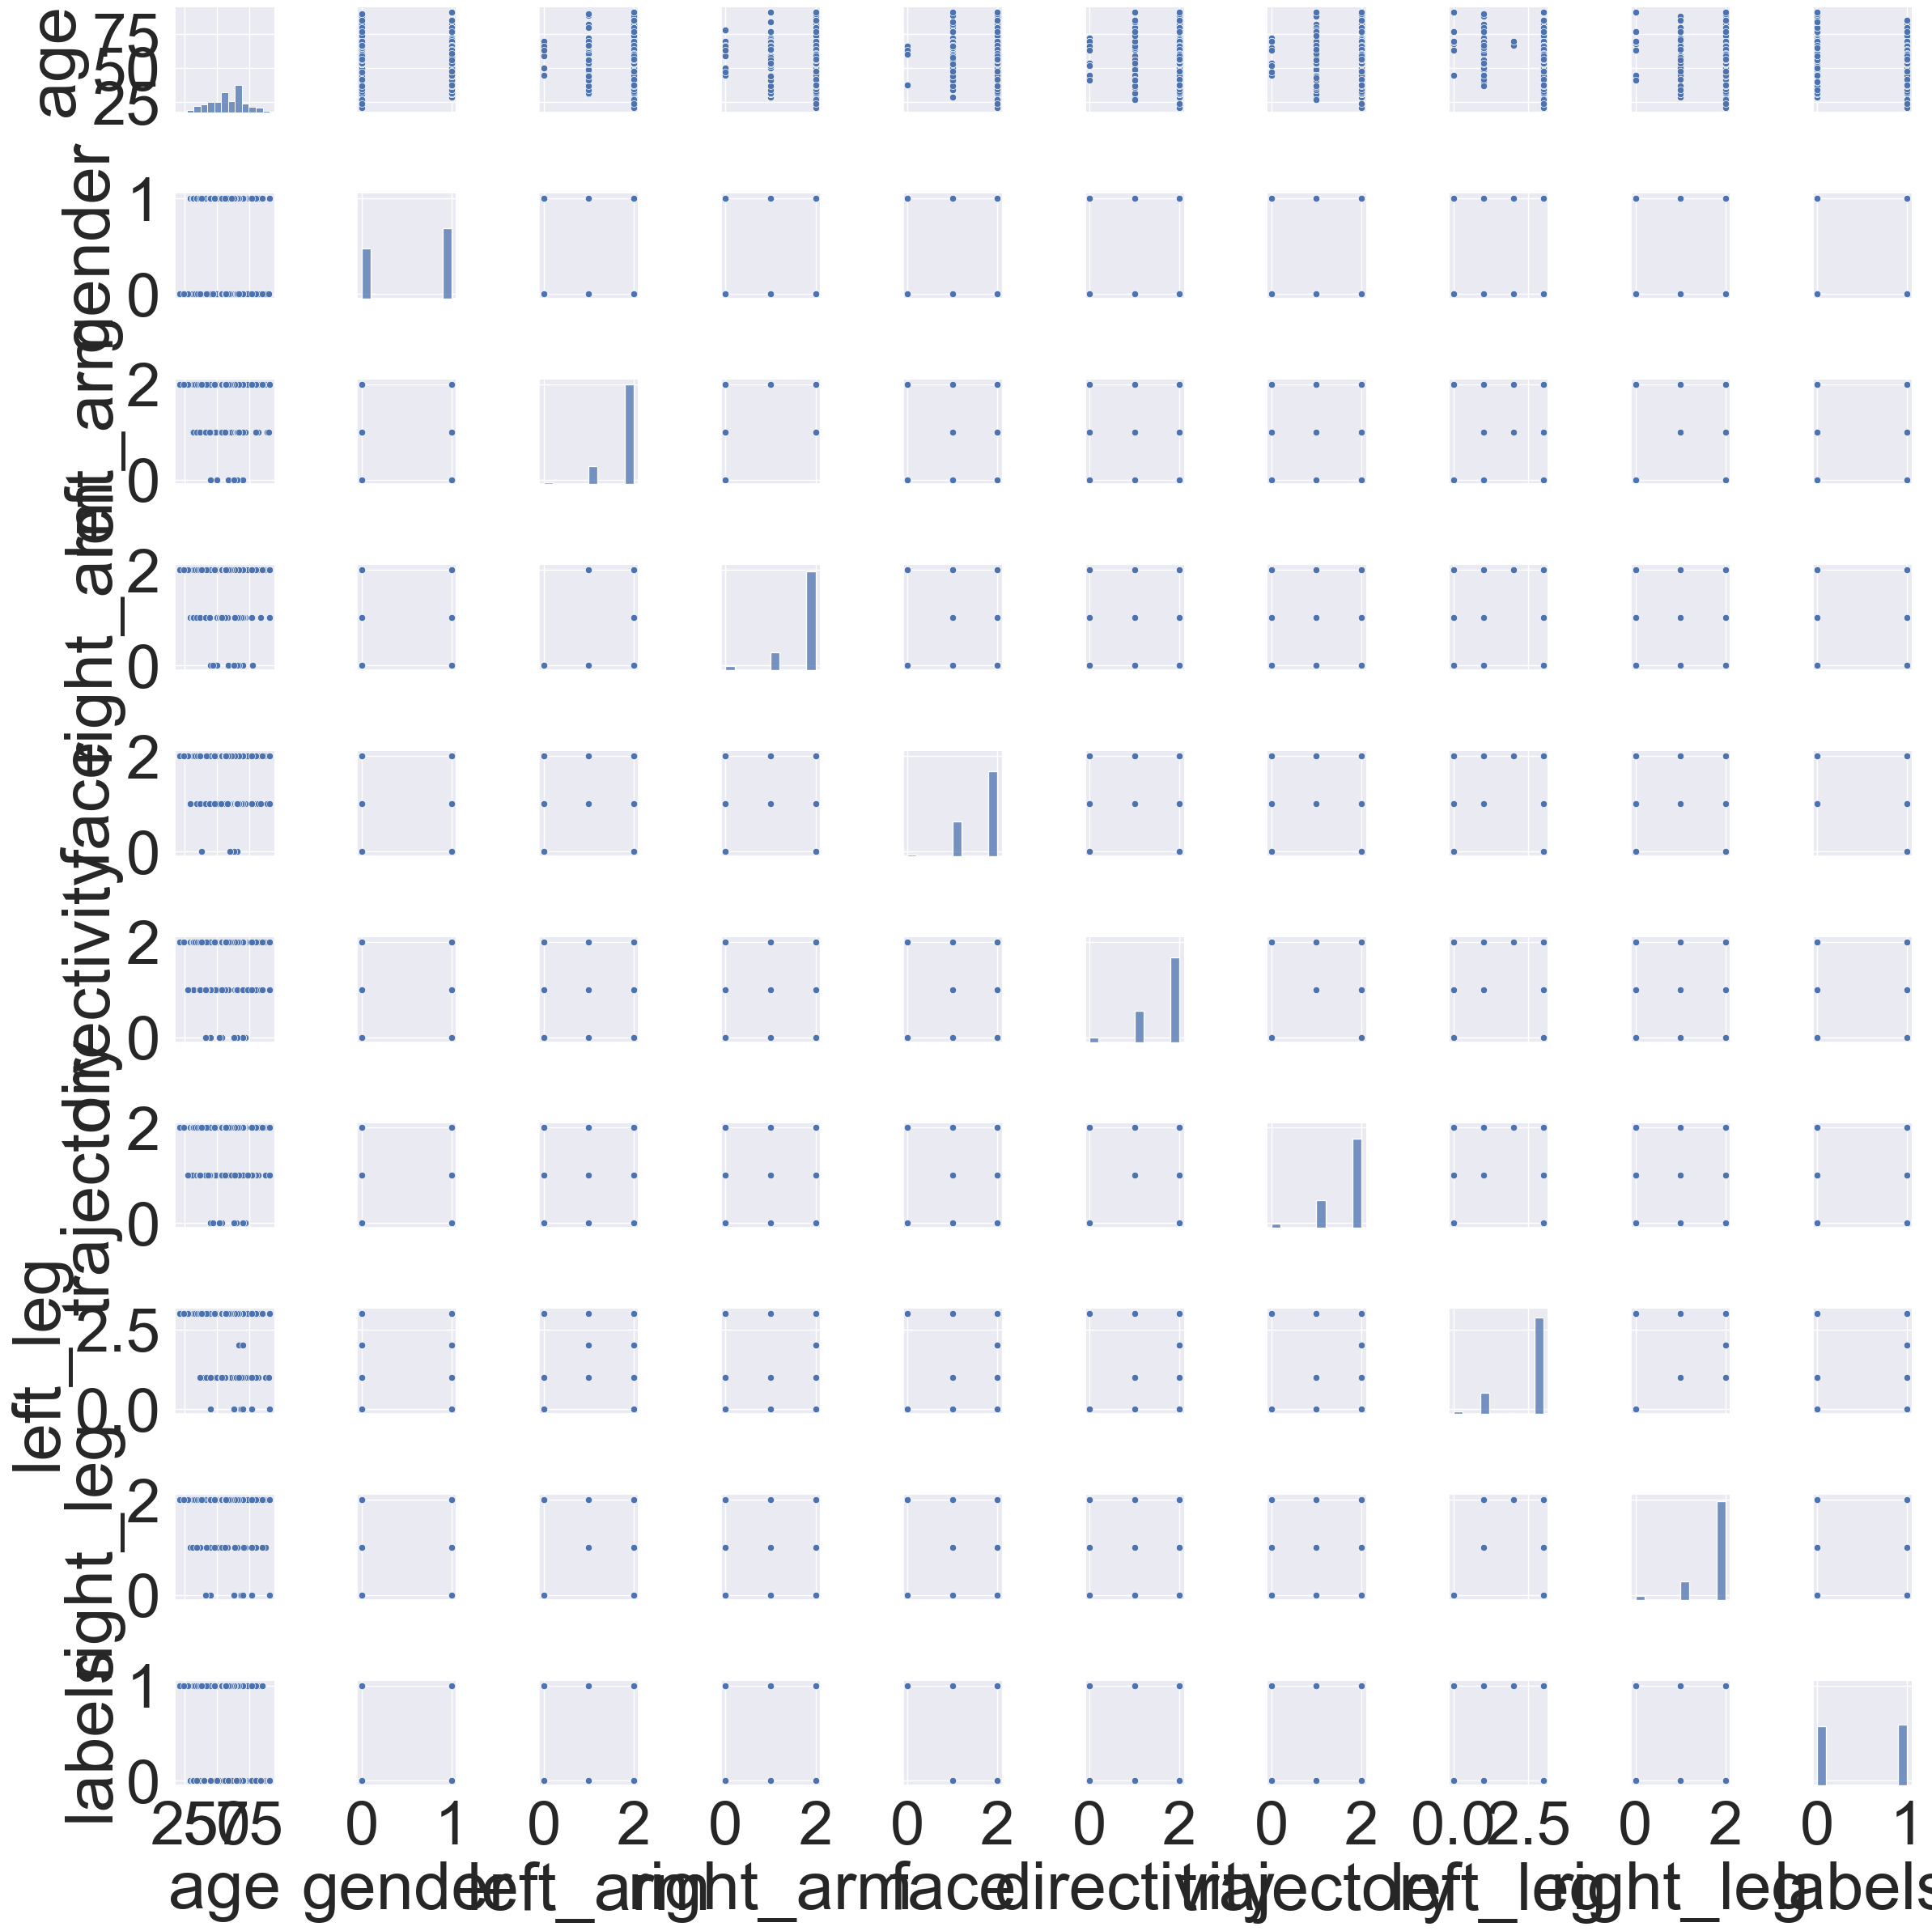

In [33]:
# plt.figure(figsize=(50,30))
# sns.pairplot(df)
# plt.savefig('pairplot.jpg',dpi=600)


# Other Plots

In [26]:
X = df.drop('labels', axis = 1)
y = df['labels']
# X = df.drop('stroke', axis = 1)

# y = df['stroke']

In [27]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (374, 10)
Y Shape (374,)


In [39]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['gender'] = le.fit_transform(df['gender'])
# df['ever_married'] = le.fit_transform(df['ever_married'])
# df['work_type'] = le.fit_transform(df['work_type'])
# df['Residence_type'] = le.fit_transform(df['Residence_type'])
# df['smoking_status'] = le.fit_transform(df['smoking_status'])
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
# X = np.array(ct.fit_transform(X))


In [28]:
X

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,hypertension
0,67,0,2,2,1,2,2,2,1,2
1,56,1,2,2,2,1,1,2,2,2
2,66,1,2,1,1,1,1,2,2,2
3,51,1,2,1,1,1,1,2,1,2
4,71,0,2,2,1,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
369,22,1,2,2,2,2,2,2,2,1
370,22,0,2,2,2,2,2,2,2,1
371,26,1,2,2,2,2,2,2,2,1
372,26,0,2,2,2,2,2,2,2,1


In [83]:
# def plots(df, variable):
#   if df[variable].dtype != object:
#     # define figure size
#     fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
#     # histogram
#     sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
#     ax[0].set_title('Histogram')
    
#     # KDE plot
#     sns.kdeplot(df[variable], ax=ax[1])
#     ax[1].set_title('KDE Plot')
    
#     # boxplot
#     sns.boxplot(y=df[variable], ax=ax[3])
#     ax[3].set_title('Boxplot')
    
#     # scatterplot
#     sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
#     ax[4].set_title('Scatterplot')
    
#     plt.tight_layout()
#     plt.show()

# for i in df.columns:
#     plots(df ,i)

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing Classes Using SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: labels
1    150
0    149
Name: count, dtype: int64
Class distribution after resampling: labels
0    150
1    150
Name: count, dtype: int64


In [32]:
def drawRoc(name_file,roc_auc,fpr,tpr):
    ax = plt.gca()
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10) 
 
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams['font.size'] = 12
    plt.xlabel('False Positive Rate', fontsize=17)
    plt.ylabel('True Positive Rate', fontsize=17)
    plt.xticks(np.arange(0, 1.05, 0.2))  # 设置 x 轴刻度为从 0 到 10，间隔为 1
    plt.yticks(np.arange(0, 1.05, 0.2))  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
    plt.title('ROC Curve', fontsize=17)
    plt.legend(loc="lower right", fontsize=17)

    
    
#     plt.show()
    plt.savefig(name_file,bbox_inches='tight',format="jpg")
    

In [33]:
def drawRoc_two(name_file,roc_auc,fpr,tpr,roc_auc1,fpr1,tpr1):
    ax = plt.gca()
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10) 
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='original ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr1, tpr1, color='b', lw=2, label='fine-tuning ROC curve (area = %0.2f)' % roc_auc1)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot([0, 1], [0, 1],lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams['font.size'] = 12
    plt.xlabel('False Positive Rate',fontsize=17)
    plt.ylabel('True Positive Rate',fontsize=17)
    plt.xticks(np.arange(0, 1.05, 0.2))  # 设置 x 轴刻度为从 0 到 10，间隔为 1
    plt.yticks(np.arange(0, 1.05, 0.2))  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
    plt.title('ROC Curve',fontsize=17)
    plt.legend(loc="lower right",fontsize=17)

#     plt.show()
    plt.savefig(name_file,bbox_inches='tight',format="svg")

In [34]:
def drawRoc_three(name_file,roc_auc,fpr,tpr,roc_auc1,fpr1,tpr1,roc_auc2,fpr2,tpr2):
    ax = plt.gca()
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10) 
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr1, tpr1, color='b', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='g', lw=2, label='XGBRForest ROC curve (area = %0.2f)' % roc_auc2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot([0, 1], [0, 1],lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams['font.size'] = 12
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xticks(np.arange(0, 1.05, 0.2))  # 设置 x 轴刻度为从 0 到 10，间隔为 1
    plt.yticks(np.arange(0, 1.05, 0.2))  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
    plt.title('ROC Curve',fontsize=15)
    plt.legend(loc="lower right",fontsize=17)
    
#     plt.show()
    plt.savefig(name_file)

# 1.随机森林和XGBoost，参数搜索

In [35]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

In [36]:
X=X_train_res
y=y_train_res
rf0 = RandomForestClassifier(oob_score=False,n_estimators=100, random_state=10)
rf0.fit(X,y)

score_pre = cross_val_score(rf0,X,y,cv=10).mean()
score_pre
y_rf0test_pred = rf0.predict(X_test)
y_rf0test_pred
# print(rf0.oob_score_)
# print("accuracy:%f"%rf0.oob_score_)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0])

0.8266666666666665 85


C:\Users\37454\AppData\Local\Temp\ipykernel_28632\3953542716.py:31: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, color='white')


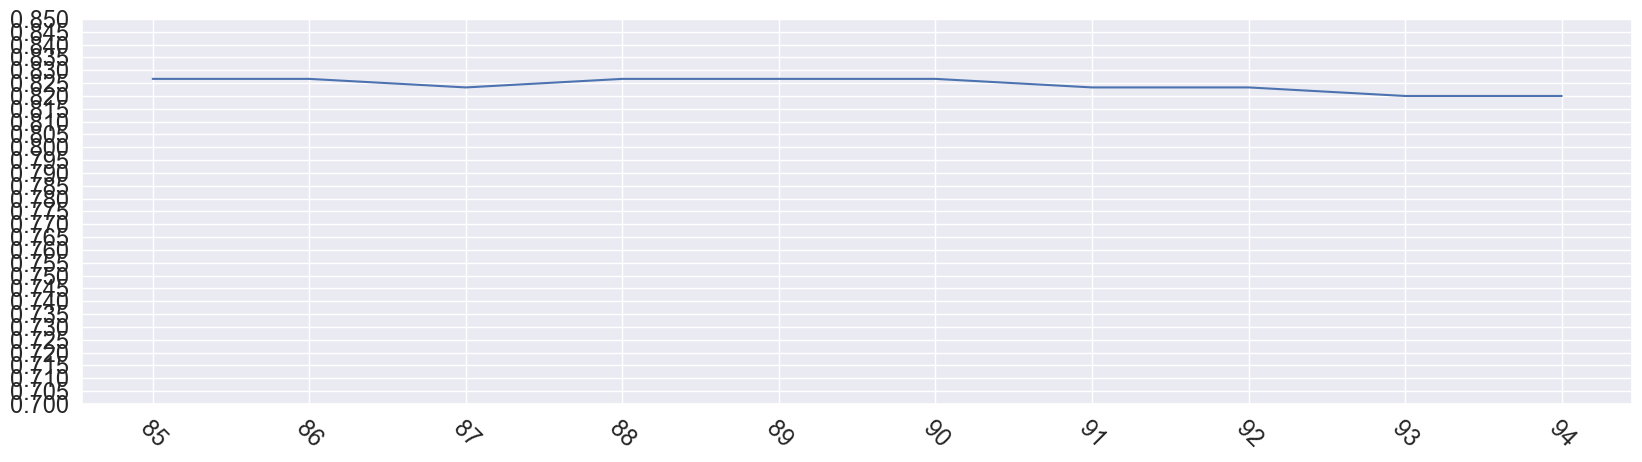

In [42]:
# scorel = []
# for i in range(0,200,10):
#     rfc = RandomForestClassifier(n_estimators=i+1,
#                                  n_jobs=-1,
#                                  random_state=10)
#     score = cross_val_score(rfc,X,y,cv=10).mean()
#     scorel.append(score)

# print(max(scorel),(scorel.index(max(scorel))*10)+1)
# plt.figure(figsize=[20,5])
# plt.plot(range(0,200, 10),scorel)
# plt.xticks(np.arange(0,200,10),fontsize = 17, rotation=-45)  # 设置 x 轴刻度为从 0 到 10，间隔为 1
# plt.yticks(np.arange(0.7, 0.85, 0.005), fontsize = 17)  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
# plt.show()

scorel = []
for i in range(85,95):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=10)
    score = cross_val_score(rfc,X,y,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(85,95)][scorel.index(max(scorel))]))
plt.rcParams['figure.facecolor'] = 'w'

plt.figure(figsize=[20,5])
plt.plot(range(85,95),scorel)
plt.xticks(np.arange(85,95),fontsize = 17, rotation=-45)  # 设置 x 轴刻度为从 0 到 10，间隔为 1
plt.yticks(np.arange(0.7, 0.85, 0.005), fontsize = 17)  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
plt.grid(False, color='white')
plt.show()

In [87]:
param_grid = {'max_depth':np.arange(1, 10, 1)}

rfc = RandomForestClassifier(n_estimators=85
                             ,random_state=10
                             )
GS_maxDepth = GridSearchCV(rfc,param_grid,cv=10)
GS_maxDepth.fit(X, y)
print(GS_maxDepth.best_params_)
print("准确率:",GS_maxDepth.best_score_)

rfc_maxDepth = RandomForestClassifier(n_estimators=85
                             ,random_state=10
                             ,max_depth=6 )
score_pre = cross_val_score(rfc_maxDepth,X,y,cv=10).mean()
print("设置max_depth准确率：", score_pre)

{'max_depth': 6}
准确率: 0.8466666666666667
设置max_depth准确率： 0.8466666666666667


In [88]:
param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=85
                             ,random_state=10,
                             max_depth=6
                             )
GS_maxFeatures = GridSearchCV(rfc,param_grid,cv=10)
GS_maxFeatures.fit(X,y)
print(GS_maxFeatures.best_params_)
print("准确率:",GS_maxFeatures.best_score_)

# RF_best = GS_maxFeatures.best_estimator_

{'max_features': 5}
准确率: 0.8466666666666669


In [108]:
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)}

rfc = RandomForestClassifier(n_estimators=85
                             ,random_state=10,
                             max_depth=6,
                             max_features=5
                             )
GS_min_samples_leaf = GridSearchCV(rfc,param_grid,cv=10)
GS_min_samples_leaf.fit(X,y)
print(GS_min_samples_leaf.best_params_)
print("准确率:",GS_min_samples_leaf.best_score_)

{'min_samples_leaf': 3}
准确率: 0.8533333333333335


In [109]:
param_grid = {'min_samples_split':np.arange(2,2+20,1)}
rfc = RandomForestClassifier(n_estimators=85
                             ,random_state=10,
                             max_depth=6,
                             max_features=5,
                             min_samples_leaf=3
                             )
GS_min_samples_split = GridSearchCV(rfc,param_grid,cv=10)
GS_min_samples_split.fit(X,y)
print(GS_min_samples_split.best_params_)
print("准确率:",GS_min_samples_split.best_score_)

{'min_samples_split': 2}
准确率: 0.8533333333333335


In [110]:
param_grid = {'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=85
                             ,random_state=10,
                             max_depth=6,
                             max_features=5,
                             min_samples_leaf=3,
                             min_samples_split=2
                             )
GS_criterion = GridSearchCV(rfc,param_grid,cv=10)
GS_criterion.fit(X,y)
print(GS_criterion.best_params_)
print("准确率:",GS_criterion.best_score_)
RF_best = GS_criterion.best_estimator_

{'criterion': 'gini'}
准确率: 0.8533333333333335


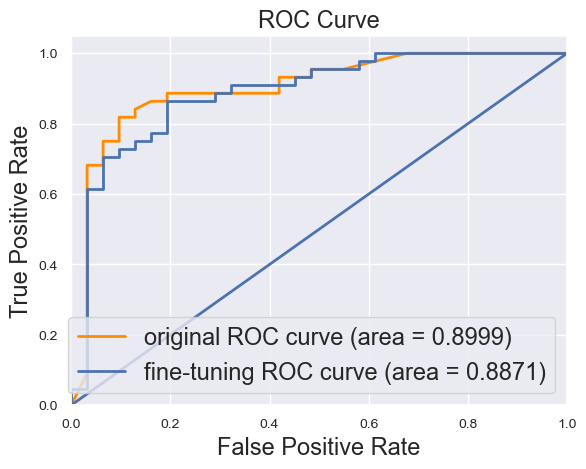

In [111]:
from sklearn import metrics
y_score = rf0.fit(X, y).predict_proba(X_test)
fpr_rf1, tpr_rf1, thresholds = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_rf1 = metrics.auc(fpr_rf1, tpr_rf1)
# drawRoc('rf.jpg',roc_auc_rf1, fpr_rf1, tpr_rf1)

y_score = RF_best.predict_proba(X_test)
fpr_rf2, tpr_rf2, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_rf2 = metrics.auc(fpr_rf2, tpr_rf2)
drawRoc_two('rf_duibi.svg',roc_auc_rf1, fpr_rf1, tpr_rf1,roc_auc_rf2,fpr_rf2, tpr_rf2)

In [93]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

XGBR_0= xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01,
                          max_depth = 5, min_child_weight = 1,
                          )


XGBR_0.fit(X, y)
score_pre = cross_val_score(XGBR_0,X,y,cv=10).mean()
score_pre

0.8400000000000001

In [96]:
param_test = {'n_estimators':range(80, 100, 1)}

XGBR= xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01,
                          max_depth = 5, min_child_weight = 1,
                          )
GS_nEstimators = GridSearchCV(XGBR,param_test,cv=10)
GS_nEstimators.fit(X,y)
print(GS_nEstimators.best_params_)
print("准确率:",GS_nEstimators.best_score_)

{'n_estimators': 89}
准确率: 0.8433333333333334


In [98]:

param_test1 = {'max_depth':range(0,10,1),'min_child_weight':range(0,7,1)}

XGBR= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 5, min_child_weight = 1,
                          )
GS_maxDepth_minChildWeight = GridSearchCV(XGBR,param_test1,cv=10)
GS_maxDepth_minChildWeight.fit(X,y)
print(GS_maxDepth_minChildWeight.best_params_)
print("准确率:",GS_maxDepth_minChildWeight.best_score_)

{'max_depth': 5, 'min_child_weight': 1}
准确率: 0.8433333333333334


In [99]:
param_test3 = {'gamma':[i/100.0 for i in range(0,100)]}
XGBR= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 5, min_child_weight = 1,
                          )
GS_Gamma = GridSearchCV(XGBR,param_test3,cv=10)
GS_Gamma.fit(X,y)
print(GS_Gamma.best_params_)
print("准确率:",GS_Gamma.best_score_)

{'gamma': 0.05}
准确率: 0.85


In [115]:
param_test4 = {'subsample':[i/20.0 for i in range(1,20)],'colsample_bytree':[i/20.0 for i in range(1,20)]}
XGBR= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 7, min_child_weight = 3,
                          gamma = 0.05
                          )
GS_subSample = GridSearchCV(XGBR,param_test4,cv=10)
GS_subSample.fit(X,y)
print(GS_subSample.best_params_)
print("准确率:",GS_subSample.best_score_)

Exception ignored in: <function DataIter.__del__ at 0x000001608786FD30>
Traceback (most recent call last):
  File "e:\anaconda3\envs\facial_model\lib\site-packages\xgboost\core.py", line 572, in __del__
    assert self._temporary_data is None
AttributeError: 'SingleBatchInternalIter' object has no attribute '_temporary_data'


{'colsample_bytree': 0.4, 'subsample': 0.7}
准确率: 0.8633333333333335


In [116]:
param_test5 = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}
XGBR= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 7, min_child_weight = 3,
                          gamma = 0.14, subsample=0.7, colsample_bytree=0.4
                          )
GS_regAlpha = GridSearchCV(XGBR,param_test5,cv=10)
GS_regAlpha.fit(X,y)
print(GS_regAlpha.best_params_)
print("准确率:",GS_regAlpha.best_score_)

{'reg_alpha': 0}
准确率: 0.8633333333333335


In [117]:
param_test6 = {'learning_rate':[0, 0.001, 0.005, 0.01, 0.05,0.1,0.5,1]}
XGBR= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 7, min_child_weight = 3,
                          gamma = 0.14, subsample=0.7, colsample_bytree=0.4,
                          reg_alpha = 0
                          )
GS_learnRate = GridSearchCV(XGBR,param_test6,cv=10)
GS_learnRate.fit(X,y)
print(GS_learnRate.best_params_)
print("准确率:",GS_learnRate.best_score_)

{'learning_rate': 0.01}
准确率: 0.8633333333333335


In [120]:
XGB_0= xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01,
                          max_depth = 5, min_child_weight = 1,
                          )


XGB_0.fit(X, y)
score_pre = cross_val_score(XGB_0,X,y,cv=10).mean()
print("调参前：", score_pre)

XGB_best= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 7, min_child_weight = 3,
                          gamma = 0.14, subsample=0.7, colsample_bytree=0.4,
                          reg_alpha = 0
                          )
XGB_best.fit(X, y)
score= cross_val_score(XGB_best,X,y,cv=10).mean()
print("调参后：", score)

调参前： 0.8400000000000001
调参后： 0.8633333333333335


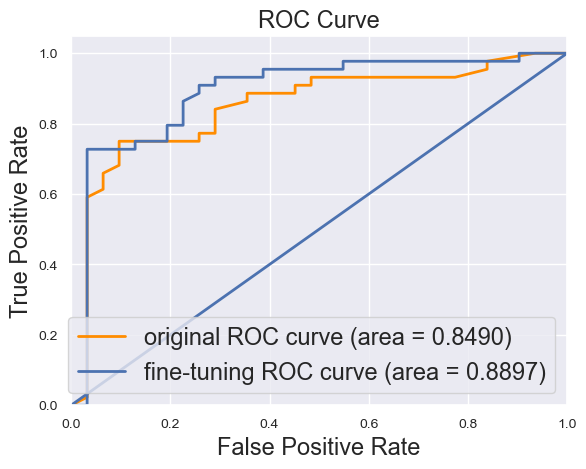

In [121]:
from sklearn import metrics
y_score = XGBR_0.fit(X, y).predict_proba(X_test)
fpr_xgb1, tpr_xgb1, thresholds = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_xgb1 = metrics.auc(fpr_xgb1, tpr_xgb1)
# drawRoc('rf.jpg',roc_auc_rf1, fpr_rf1, tpr_rf1)

y_score = XGB_best.predict_proba(X_test)
fpr_xgb2, tpr_xgb2, thresholds2 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_xgb2 = metrics.auc(fpr_xgb2, tpr_xgb2)
drawRoc_two('xgb_duibi.svg',roc_auc_xgb1, fpr_xgb1, tpr_xgb1,roc_auc_xgb2,fpr_xgb2, tpr_xgb2)


In [123]:
# 网格搜索算法
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
rfc = RandomForestClassifier(n_estimators=85
                             ,random_state=10,
                             max_depth=6,
                             max_features=5,
                             min_samples_leaf=3,
                             min_samples_split=2
                             )
RF_best.fit(X, y)
XGB_best= xgb.XGBClassifier(n_estimators = 89, learning_rate = 0.01,
                          max_depth = 7, min_child_weight = 3,
                          gamma = 0.14, subsample=0.7, colsample_bytree=0.4,
                          reg_alpha = 0
                          )
XGB_best.fit(X, y)

# 定义权重范围
weight_range = np.linspace(0, 1, 101)  # 0, 0.01, 0.02, ..., 1.0
best_a = 0
best_metric = -np.inf
best_score = None

metrics_dict = {}

for a in weight_range:
    # 计算加权预测概率
    rf_prob = RF_best.predict_proba(X_test)[:, 1]
    xgb_prob = XGB_best.predict_proba(X_test)[:, 1]
    blended_prob = a * rf_prob + (1 - a) * xgb_prob
    
    # 根据阈值0.5生成预测结果
    blended_pred = (blended_prob >= 0.5).astype(int)
    
    # 计算ROC-AUC和F1-Score
    roc_auc = roc_auc_score(y_test, blended_prob)
    f1 = f1_score(y_test, blended_pred)
    
    # 存储结果
    metrics_dict[a] = {'roc_auc': roc_auc, 'f1_score': f1}
    
    # 选择最佳权重（例如，基于ROC-AUC）
    if roc_auc > best_metric:
        best_metric = roc_auc
        best_a = a
        best_score = {'roc_auc': roc_auc, 'f1_score': f1}

print(f"最佳权重 a: {best_a}")
print(f"最佳ROC-AUC: {best_score['roc_auc']}")
print(f"对应的F1-Score: {best_score['f1_score']}")

# 使用最佳权重计算融合概率
best_blended_prob = best_a * RF_best.predict_proba(X_test)[:, 1] + (1 - best_a) * XGB_best.predict_proba(X_test)[:, 1]

# 优化分类阈值
threshold_range = np.linspace(0, 1, 101)
best_threshold = 0.5
best_f1 = -np.inf
threshold_metrics = {}

for threshold in threshold_range:
    blended_pred = (best_blended_prob >= threshold).astype(int)
    f1 = f1_score(y_test, blended_pred)
    
    threshold_metrics[threshold] = f1
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"最佳分类阈值: {best_threshold}")
print(f"对应的F1-Score: {best_f1}")


# # 如果需要，可视化性能指标随权重的变化
# import matplotlib.pyplot as plt

# a_values = list(metrics_dict.keys())
# roc_auc_values = [metrics_dict[a]['roc_auc'] for a in a_values]
# f1_values = [metrics_dict[a]['f1_score'] for a in a_values]

# plt.figure(figsize=(10, 5))
# plt.plot(a_values, roc_auc_values, label='ROC-AUC')
# plt.plot(a_values, f1_values, label='F1-Score')
# plt.xlabel('权重 a (Random Forest)')
# plt.ylabel('性能指标')
# plt.title('加权融合模型性能随权重 a 的变化')
# plt.legend()
# plt.grid(True)
# plt.show()

最佳权重 a: 0.02
最佳ROC-AUC: 0.8900293255131965
对应的F1-Score: 0.853932584269663
最佳分类阈值: 0.47000000000000003
对应的F1-Score: 0.8723404255319149


In [142]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 初始化变量
weight_range = np.linspace(0, 1, 101)  # 权重从 0 到 1 以 0.01 为步长
best_a = 0
best_metric = -np.inf
best_score = None

# 用于存储每个权重的不同指标
metrics_dict = {}

# 对每个权重进行遍历
for a in weight_range:
    # 计算加权预测概率
    rf_prob = RF_best.predict_proba(X_test)[:, 1]
    xgb_prob = XGB_best.predict_proba(X_test)[:, 1]
    blended_prob = a * rf_prob + (1 - a) * xgb_prob
    
    # 根据阈值 0.5 生成预测结果
    blended_pred = (blended_prob >= 0.5).astype(int)
    
    # 计算各种指标
    accuracy = accuracy_score(y_test, blended_pred)
    precision = precision_score(y_test, blended_pred)
    recall = recall_score(y_test, blended_pred)
    f1 = f1_score(y_test, blended_pred)
    roc_auc = roc_auc_score(y_test, blended_prob)
    
    # 存储指标
    metrics_dict[a] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    # 基于您关注的指标选择最佳权重（此处示例基于准确率）
    # if accuracy > best_metric:  # 若您想以 F1-score 为主，则改为 if f1 > best_metric
    #     best_metric = accuracy  # 若您想以 F1-score 为主，则改为 best_metric = f1
    #     best_a = a
    #     best_score = {
    #         'accuracy': accuracy,
    #         'precision': precision,
    #         'recall': recall,
    #         'f1_score': f1,
    #         'roc_auc': roc_auc
    #     }
        
    # if f1 > best_metric:  # 若您想以 F1-score 为主，则改为 if f1 > best_metric
    #     best_metric = f1  # 若您想以 F1-score 为主，则改为 best_metric = f1
    #     best_a = a
    #     best_score = {
    #         'accuracy': accuracy,
    #         'precision': precision,
    #         'recall': recall,
    #         'f1_score': f1,
    #         'roc_auc': roc_auc
    #     }
    # if roc_auc > best_metric:
    #     best_metric = roc_auc  # 若您想以 F1-score 为主，则改为 best_metric = f1
    #     best_a = a
    #     best_score = {
    #         'accuracy': accuracy,
    #         'precision': precision,
    #         'recall': recall,
    #         'f1_score': f1,
    #         'roc_auc': roc_auc
    #     }        
    if roc_auc > best_metric:
        best_metric = roc_auc  # 若您想以 F1-score 为主，则改为 best_metric = f1
        best_a = a
        best_score = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        }    

# 打印最佳结果
print(f"最佳权重 a: {best_a}")
print(f"基于recall的最佳分数：")
print(f"准确率: {best_score['accuracy']}")
print(f"精确率: {best_score['precision']}")
print(f"召回率: {best_score['recall']}")
print(f"F1-Score: {best_score['f1_score']}")
print(f"ROC-AUC: {best_score['roc_auc']}")


# 使用最佳权重计算融合概率
best_blended_prob = best_a * RF_best.predict_proba(X_test)[:, 1] + (1 - best_a) * XGB_best.predict_proba(X_test)[:, 1]

# 优化分类阈值
threshold_range = np.linspace(0, 1, 101)
best_threshold = 0.5
best_f1 = -np.inf
threshold_metrics = {}

for threshold in threshold_range:
    blended_pred = (best_blended_prob >= threshold).astype(int)
    f1 = f1_score(y_test, blended_pred)
    
    threshold_metrics[threshold] = f1
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"最佳分类阈值: {best_threshold}")
print(f"对应的F1-Score: {best_f1}")

最佳权重 a: 0.02
基于recall的最佳分数：
准确率: 0.8266666666666667
精确率: 0.8444444444444444
召回率: 0.8636363636363636
F1-Score: 0.853932584269663
ROC-AUC: 0.8900293255131965
最佳分类阈值: 0.47000000000000003
对应的F1-Score: 0.8723404255319149


融合模型类

In [125]:
# 定义融合模型类
class XGBRForest:
    def __init__(self, rf_model, xgb_model, a=0.5, threshold=0.5):
        """
        初始化融合模型。
        
        参数：
        - rf_model: 已训练的随机森林模型
        - xgb_model: 已训练的XGBoost模型
        - a: 随机森林模型的权重
        - threshold: 分类阈值
        """
        self.rf_model = rf_model
        self.xgb_model = xgb_model
        self.a = a
        self.threshold = threshold
    
    def predict_proba(self, X):
        rf_prob = self.rf_model.predict_proba(X)[:, 1]
        xgb_prob = self.xgb_model.predict_proba(X)[:, 1]
        blended_prob = self.a * rf_prob + (1 - self.a) * xgb_prob
        return np.vstack([1 - blended_prob, blended_prob]).T
    
    def predict(self, X):
        blended_prob = self.a * self.rf_model.predict_proba(X)[:, 1] + (1 - self.a) * self.xgb_model.predict_proba(X)[:, 1]
        return (blended_prob >= self.threshold).astype(int)

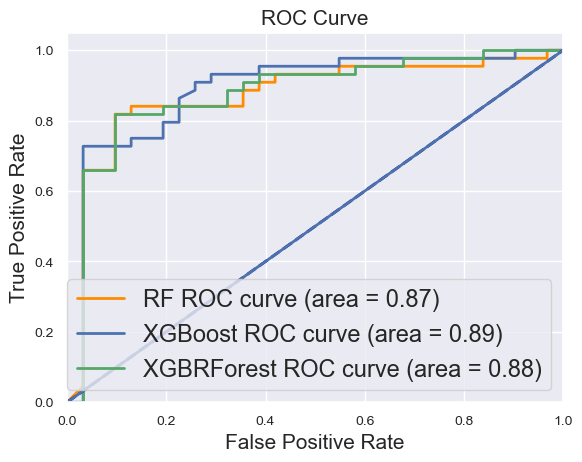

In [155]:
# 创建融合模型实例
xgbrforest_model = XGBRForest(
    rf_model=RF_best,
    xgb_model=XGB_best,
    a=0.66,
    threshold=0.5
)

# 计算预测概率
rf_prob = RF_best.predict_proba(X_test)[:, 1]
xgb_prob = XGB_best.predict_proba(X_test)[:, 1]
xgbrforest_prob = xgbrforest_model.predict_proba(X_test)[:, 1]

# 计算ROC曲线和AUC
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, rf_prob)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, xgb_prob)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)

fpr_xgbrforest, tpr_xgbrforest, _ = metrics.roc_curve(y_test, xgbrforest_prob)
roc_auc_xgbrforest = metrics.auc(fpr_xgbrforest, tpr_xgbrforest)

# 调用绘图函数，保存为 'roc_comparison.png'
drawRoc_three(
    'roc_comparison.png',
    roc_auc_rf, fpr_rf, tpr_rf,
    roc_auc_xgb, fpr_xgb, tpr_xgb,
    roc_auc_xgbrforest, fpr_xgbrforest, tpr_xgbrforest
)

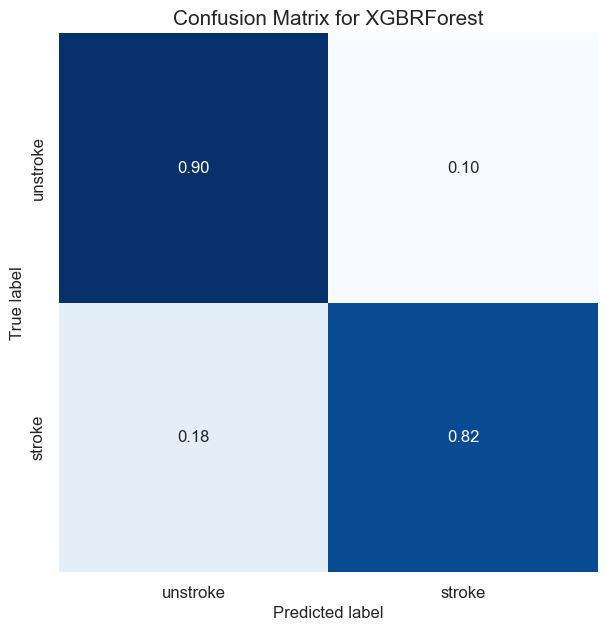

In [156]:
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 生成XGBRForest模型的预测结果
y_test_pred = xgbrforest_model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
cm_percentage = cm / cm.sum(axis=1, keepdims=True) 
# 可视化混淆矩阵
plt.figure(figsize=(7, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False, square=True,
            xticklabels=['unstroke', 'stroke'], yticklabels=['unstroke', 'stroke']) 
plt.title('Confusion Matrix for XGBRForest', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.xticks(fontsize=12)  # 调整X轴刻度字体大小
plt.yticks(fontsize=12)  # 调整Y轴刻度字体大小
plt.show()

In [157]:
y_test_pred = xgbrforest_model.predict(X_test)
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
y_RFtest_pred = RF_best.predict(X_test)
RF_cm = confusion_matrix(y_test, y_RFtest_pred)
RF_cm
y_XGBtest_pred = XGB_best.predict(X_test)
XGB_cm = confusion_matrix(y_test, y_XGBtest_pred)
RF_cm, XGB_cm, cm

(array([[28,  3],
        [ 8, 36]], dtype=int64),
 array([[24,  7],
        [ 6, 38]], dtype=int64),
 array([[28,  3],
        [ 8, 36]], dtype=int64))

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def preformeace(y_test_pred, y_test, model_name):
    # 计算准确率
    accuracy = accuracy_score(y_test, y_test_pred)

    # 计算精确率
    precision = precision_score(y_test, y_test_pred, average='binary')  # 对于二分类

    # 计算召回率
    recall = recall_score(y_test, y_test_pred, average='binary')

    # 计算F1分数
    f1 = f1_score(y_test, y_test_pred, average='binary')

    # 打印结果
    print(f"{model_name} 准确率 (Accuracy): {accuracy:.4f}")
    print(f"{model_name} 精确率 (Precision): {precision:.4f}")
    print(f"{model_name} 召回率 (Recall): {recall:.4f}")
    print(f"{model_name} F1分数 (F1-score): {f1:.4f}")


In [159]:
rf0 = RandomForestClassifier(oob_score=False,n_estimators=10, random_state=10)
rf0.fit(X, y)
XGB_0= xgb.XGBClassifier(n_estimators = 10)
XGB_0.fit(X, y)

y_test_pred_XGBRF = xgbrforest_model.predict(X_test)
preformeace(y_test_pred_XGBRF, y_test, "XGBRForest")
y_rf0test_pred = rf0.predict(X_test)
preformeace(y_rf0test_pred, y_test, "RF_0")
y_RFtest_pred = RF_best.predict(X_test)
preformeace(y_RFtest_pred, y_test, "RF")
y_XGB0test_pred = XGB_0.predict(X_test)
preformeace(y_XGB0test_pred, y_test, "XGBoost_0")
y_XGBtest_pred = XGB_best.predict(X_test)
preformeace(y_XGBtest_pred, y_test, "XGBoost")

XGBRForest 准确率 (Accuracy): 0.8533
XGBRForest 精确率 (Precision): 0.9231
XGBRForest 召回率 (Recall): 0.8182
XGBRForest F1分数 (F1-score): 0.8675
RF_0 准确率 (Accuracy): 0.8533
RF_0 精确率 (Precision): 0.9231
RF_0 召回率 (Recall): 0.8182
RF_0 F1分数 (F1-score): 0.8675
RF 准确率 (Accuracy): 0.8533
RF 精确率 (Precision): 0.9231
RF 召回率 (Recall): 0.8182
RF F1分数 (F1-score): 0.8675
XGBoost_0 准确率 (Accuracy): 0.8267
XGBoost_0 精确率 (Precision): 0.8974
XGBoost_0 召回率 (Recall): 0.7955
XGBoost_0 F1分数 (F1-score): 0.8434
XGBoost 准确率 (Accuracy): 0.8267
XGBoost 精确率 (Precision): 0.8444
XGBoost 召回率 (Recall): 0.8636
XGBoost F1分数 (F1-score): 0.8539


In [160]:
import joblib
joblib.dump(xgbrforest_model, 'stroke_model.pkl')
print("模型已保存为'stroke_model.pkl'")

模型已保存为'stroke_model.pkl'


In [274]:
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}

rfc = RandomForestClassifier(n_estimators=47
                             ,random_state=10,
                             max_depth=6, max_features=7
                             )
GS_min_samples_leaf = GridSearchCV(rfc,param_grid,cv=10)
GS_min_samples_leaf.fit(X,y)
print(GS_min_samples_leaf.best_params_)
print("准确率:",GS_min_samples_leaf.best_score_)

rfc_min_samples_leaf = RandomForestClassifier(n_estimators=47
                             ,random_state=10
                             ,max_depth=6, max_features=7,
                              min_samples_leaf=1 )
score_pre = cross_val_score(rfc_min_samples_leaf,X,y,cv=10).mean()
print("设置max_depth准确率：", score_pre)

{'min_samples_leaf': 1}
准确率: 0.8308602150537634
设置max_depth准确率： 0.8308602150537634


In [275]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}

rfc = RandomForestClassifier(n_estimators=47
                             ,random_state=10,
                             max_depth=6, max_features=7
                             )
GS_min_samples_split = GridSearchCV(rfc,param_grid,cv=10)
GS_min_samples_split.fit(X,y)
print(GS_min_samples_split.best_params_)
print("准确率:",GS_min_samples_split.best_score_)

{'min_samples_split': 2}
准确率: 0.8308602150537634


In [276]:
param_grid = {'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=47
                             ,random_state=10,
                             max_depth=6, max_features=7
                             )
GS_criterion = GridSearchCV(rfc,param_grid,cv=10)
GS_criterion.fit(X,y)

print(GS_criterion.best_params_)
print("准确率:",GS_criterion.best_score_)

{'criterion': 'gini'}
准确率: 0.8308602150537634


In [106]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,alpha = 10)
# xgb_model = xgb.XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')
xgb_model.fit(X,y)
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracies:", scores)
print("Average accuracy:", scores.mean())
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Cross-validated accuracies: [0.74074074 0.68518519 0.72222222 0.85185185 0.7037037 ]
Average accuracy: 0.7407407407407407
0.8208955223880597


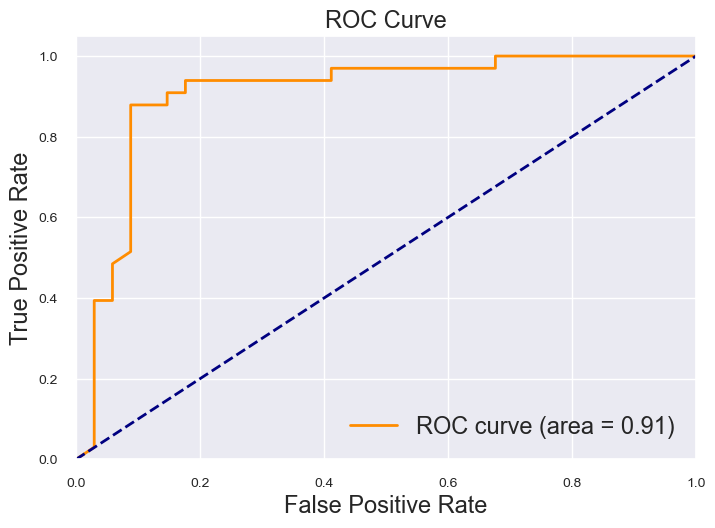

In [107]:
from sklearn import metrics
y_score = rf0.fit(X, y).predict_proba(X_test)
fpr_rf1, tpr_rf1, thresholds = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_rf1 = metrics.auc(fpr_rf1, tpr_rf1)
drawRoc('rf.jpg',roc_auc_rf1, fpr_rf1, tpr_rf1)

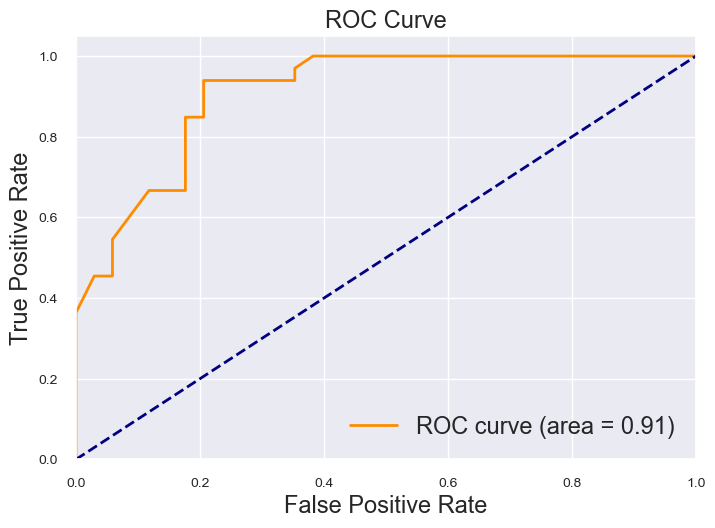

In [108]:
y_score = xgb_model.fit(X, y).predict_proba(X_test)
fpr_xgb1, tpr_xgb1, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_xgb1 = metrics.auc(fpr_xgb1, tpr_xgb1)
drawRoc('xgb_model.svg',roc_auc_xgb1, fpr_xgb1, tpr_xgb1)

绘制特征重要性

In [131]:
import matplotlib.pyplot as plt
print(XGBR.feature_importances_)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(10)  
features = ['age','gender','left arm','right arm', 'face','directivity', 'trajectory', 'left leg', 'right leg','hypertension']
plt.bar(features, XGBR.feature_importances_)
plt.xlim()  # 设置 x 轴刻度为从 0 到 10，间隔为 1
plt.yticks(np.arange(0, 0.225, 0.025))  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
plt.show()
# from matplotlib import pyplot
# print(xgb_model.feature_importances_)
# pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
# pyplot.show()

NotFittedError: need to call fit or load_model beforehand

# 1.1  对n_estimators进行参数择优

# RF参数搜索

In [111]:
param_test1 = {"n_estimators":range(1,301,10)}
Rf_model = RandomForestClassifier(oob_score=True,random_state=10,max_depth=20)
gsearch1 = GridSearchCV(estimator=Rf_model,param_grid=param_test1,scoring="roc_auc",cv=10)
Rf_model.fit(X, y)
gsearch1.fit(X, y)
rf_best=gsearch1.best_estimator_
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 91}
best accuracy:0.840110


In [112]:
# 在测试集上评估原始模型
y_pred_original = Rf_model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("原始模型准确率：", accuracy_original)

# 在测试集上评估网格搜索后的最佳模型
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("网格搜索后最佳模型准确率：", accuracy_best)

原始模型准确率： 0.8208955223880597
网格搜索后最佳模型准确率： 0.8208955223880597


[{'n_estimators': 1}, {'n_estimators': 11}, {'n_estimators': 21}, {'n_estimators': 31}, {'n_estimators': 41}, {'n_estimators': 51}, {'n_estimators': 61}, {'n_estimators': 71}, {'n_estimators': 81}, {'n_estimators': 91}, {'n_estimators': 101}, {'n_estimators': 111}, {'n_estimators': 121}, {'n_estimators': 131}, {'n_estimators': 141}, {'n_estimators': 151}, {'n_estimators': 161}, {'n_estimators': 171}, {'n_estimators': 181}, {'n_estimators': 191}, {'n_estimators': 201}, {'n_estimators': 211}, {'n_estimators': 221}, {'n_estimators': 231}, {'n_estimators': 241}, {'n_estimators': 251}, {'n_estimators': 261}, {'n_estimators': 271}, {'n_estimators': 281}, {'n_estimators': 291}]
[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291]
0.656319  with:   {'n_estimators': 1}
0.797253  with:   {'n_estimators': 11}
0.815934  with:   {'n_estimators': 21}
0.822802  with:   {'n_estimators': 31}
0.827747  with:   {'n_est

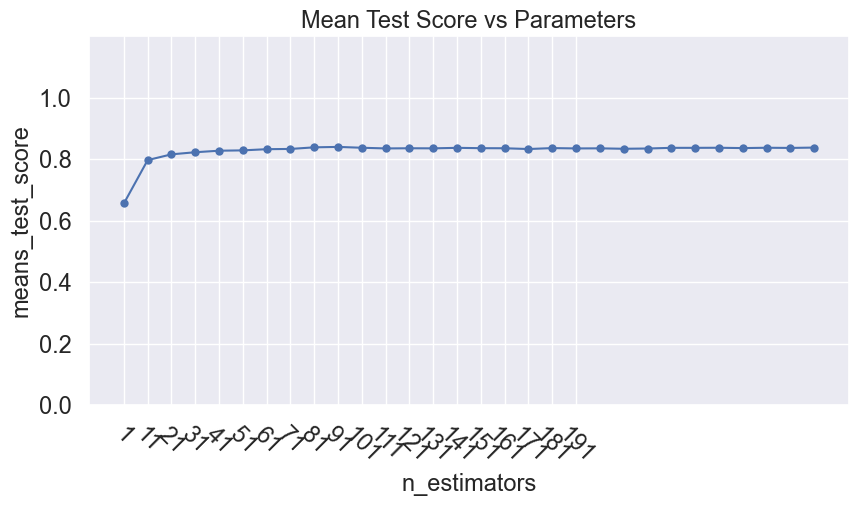

In [113]:
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
print(params)
values = []
for param in params:
    for value in param.values():
        values.append(value)
print(values)
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 12
plt.plot(values, means, marker='o', linestyle='-', color='b')
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs Parameters', fontsize=17)
# plt.xticks(range(len(params)), [str(p) for p in params], rotation=45)
plt.tight_layout()
# plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])

plt.xlabel('n_estimators', fontsize=17)
plt.ylabel('means_test_score', fontsize=17)
plt.xticks(np.arange(1, 201, 10),fontsize = 17, rotation=-45)  # 设置 x 轴刻度为从 0 到 10，间隔为 1
plt.yticks(np.arange(0, 1.2, 0.2), fontsize = 17)  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
# plt.title('ROC Curve', fontsize=17)
# plt.legend(loc="lower right", fontsize=17)
plt.show()


In [114]:
def print_res(model):
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    pre=metrics.precision_score(y_test, y_pred, average='macro')
    recall=metrics.recall_score(y_test, y_pred, average='macro')
    f1=metrics.f1_score(y_test, y_pred, average='weighted')  
    print('acc: ',acc)
    print('prec: ',pre)
    print('reacall:',recall)
    print('f1: ',f1)

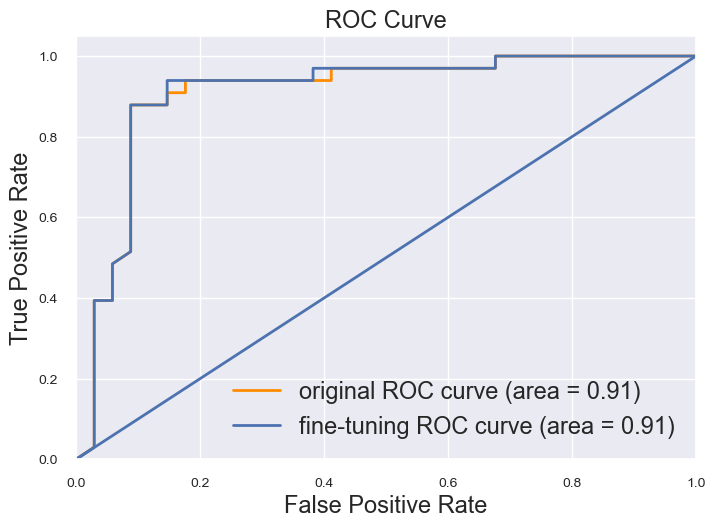

In [115]:
y_score = rf_best.predict_proba(X_test)
fpr_rf2, tpr_rf2, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_rf2 = metrics.auc(fpr_rf2, tpr_rf2)
drawRoc_two('rf_duibi.svg',roc_auc_rf1, fpr_rf1, tpr_rf1,roc_auc_rf2,fpr_rf2, tpr_rf2)


# XGBoost参数搜索

In [116]:
param_test1 = {"n_estimators":range(1,301,10)}
# xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 50)
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,alpha = 10)
xgb_model.fit(X_train_res, y_train_res)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_test1, cv=3, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)
xgb_best = grid_search.best_estimator_
print(grid_search.best_params_)

{'n_estimators': 11}


In [75]:
# 在测试集上评估原始模型
y_pred_original = xgb_model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("原始模型准确率：", accuracy_original)

# 在测试集上评估网格搜索后的最佳模型
y_pred_best = xgb_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("网格搜索后最佳模型准确率：", accuracy_best)

原始模型准确率： 0.863013698630137
网格搜索后最佳模型准确率： 0.8356164383561644


[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
0.691947  with:   {'n_estimators': 1}
0.751683  with:   {'n_estimators': 11}
0.774917  with:   {'n_estimators': 21}
0.778185  with:   {'n_estimators': 31}
0.788152  with:   {'n_estimators': 41}
0.784851  with:   {'n_estimators': 51}
0.791452  with:   {'n_estimators': 61}
0.791452  with:   {'n_estimators': 71}
0.791452  with:   {'n_estimators': 81}
0.788119  with:   {'n_estimators': 91}


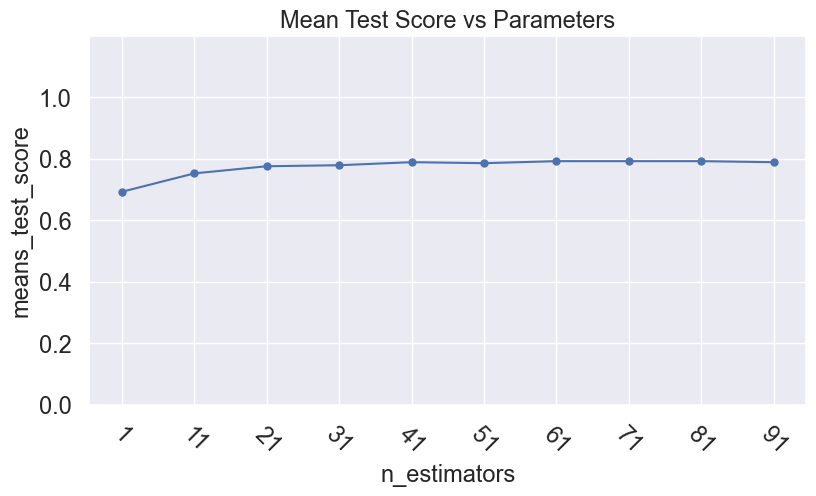

In [49]:
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

values = []
for param in params:
    for value in param.values():
        values.append(value)
print(values)
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 12
plt.plot(values, means, marker='o', linestyle='-', color='b')
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs Parameters', fontsize=17)
# plt.xticks(range(len(params)), [str(p) for p in params], rotation=45)
plt.tight_layout()
# plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])

plt.xlabel('n_estimators', fontsize=17)
plt.ylabel('means_test_score', fontsize=17)
plt.xticks(np.arange(1, 101, 10),fontsize = 17, rotation=-45)  # 设置 x 轴刻度为从 0 到 10，间隔为 1
plt.yticks(np.arange(0, 1.2, 0.2), fontsize = 17)  # 设置 y 轴刻度为从 -1 到 1，间隔为 0.2
# plt.title('ROC Curve', fontsize=17)
# plt.legend(loc="lower right", fontsize=17)
plt.show()    

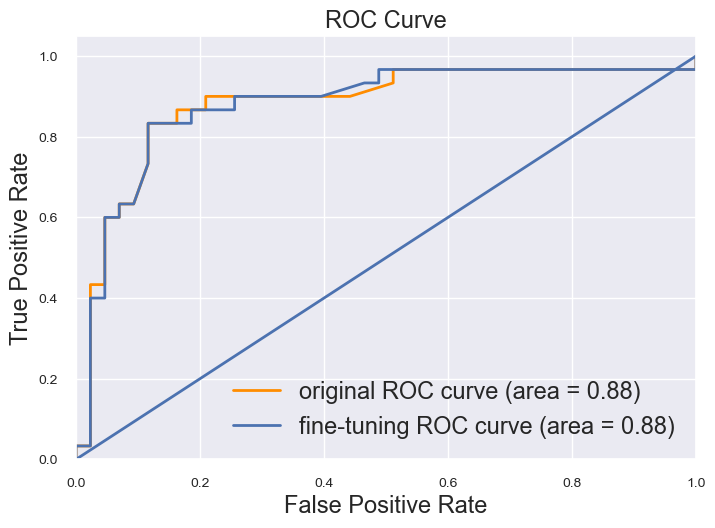

In [50]:
y_score = xgb_best.predict_proba(X_test)
fpr_xgb2, tpr_xgb2, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_xgb2 = metrics.auc(fpr_xgb2, tpr_xgb2)
drawRoc_two('xgb_best_tuning.g',roc_auc_xgb1, fpr_xgb1, tpr_xgb1,roc_auc_xgb2,fpr_xgb2, tpr_xgb2)

# 2.随机森林结合XGBoost

# 2.1加权平均投票法

In [379]:

def blended_predictions(X,a,y_test):
    y_pred=((a * RF_best.predict_proba(X)) + ((1-a)* XGB_best.predict_proba(X)))
    hunhe_score=[]
    for i in range(len(y_pred)):
        if y_pred[i][0]>=0.5:
            hunhe_score.append(0)
        else:
            hunhe_score.append(1)
    acc=accuracy_score(y_test, hunhe_score)
    pre=metrics.precision_score(y_test, hunhe_score, average='macro')
    recall=metrics.recall_score(y_test, hunhe_score, average='macro')
    f1=metrics.f1_score(y_test, hunhe_score, average='weighted')  
    return acc,pre,recall,f1


In [381]:
i=0
acc=[]
pre=[]
recall=[]
f1=[]
for _ in range(10):
    i=i+0.1
    acc1,pre1,recall1,f11 = blended_predictions(X_test,i,y_test)
    acc.append(acc1)
    pre.append(pre1)
    recall.append(recall1)
    f1.append(f11)
    
print('acc: ',acc)
print('prec: ',pre)
print('reacall:',recall)
print('f1: ',f1)


acc:  [0.8493150684931506, 0.8356164383561644, 0.8356164383561644, 0.8356164383561644, 0.8356164383561644, 0.8356164383561644, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.8356164383561644]
prec:  [0.843939393939394, 0.8296493902439024, 0.8296493902439024, 0.8296493902439024, 0.8296493902439024, 0.8296493902439024, 0.8585271317829457, 0.8585271317829457, 0.8585271317829457, 0.8296493902439024]
reacall: [0.8519379844961241, 0.8352713178294574, 0.8352713178294574, 0.8352713178294574, 0.8352713178294574, 0.8352713178294574, 0.8585271317829457, 0.8585271317829457, 0.8585271317829457, 0.8352713178294574]
f1:  [0.8501795833038612, 0.8363108389621867, 0.8363108389621867, 0.8363108389621867, 0.8363108389621867, 0.8363108389621867, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.8363108389621867]


# XGBRForest ROC曲线

固定参数a

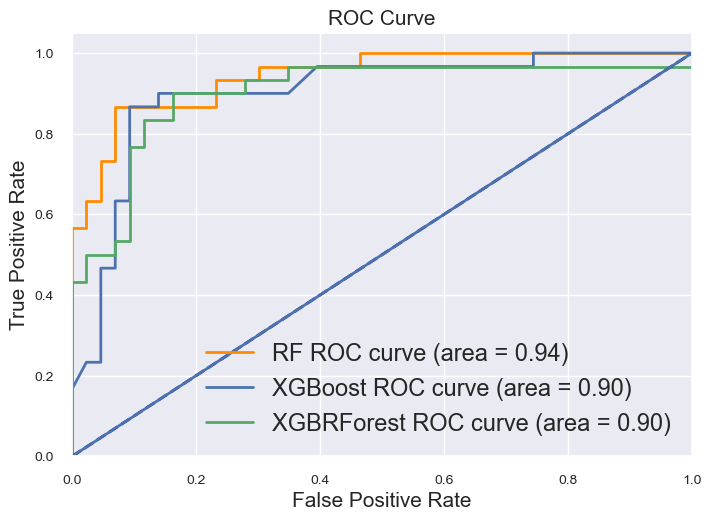

In [385]:
a=0.2
y_score=((a * RF_best.predict_proba(X_test)) + ((1-a)* XGB_best.predict_proba(X_test)))
fpr_XGBRForest, tpr_XGBRForest, thresholds1 = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc_XGBRForest= metrics.auc(fpr_XGBRForest, tpr_XGBRForest)
drawRoc_three('three.svg',roc_auc_rf1, fpr_rf1, tpr_rf1,roc_auc_xgb1, fpr_xgb1, tpr_xgb1,roc_auc_XGBRForest, fpr_XGBRForest, tpr_XGBRForest)

In [384]:
# fpr_XGBRForest, tpr_XGBRForest

In [47]:
hunhe_score=[]
for i in range(len(blended_score)):
    if blended_score[i][0]>=0.5:
        hunhe_score.append(0)
    else:
        hunhe_score.append(1)
print(hunhe_score)

NameError: name 'blended_score' is not defined

In [48]:
res=accuracy_score(y_test, hunhe_score)
print(res)

ValueError: Found input variables with inconsistent numbers of samples: [73, 0]

# 2.2 XGBRFRegressor

In [187]:

xgb_model = xgb.XGBRFRegressor(random_state=42).fit(
    X_train_res, y_train_res)
score=xgb_model.score(X_test, y_test)
print(score)

    

0.3693817286401131


In [188]:
import xgboost as xgb
rf = RandomForestClassifier(oob_score=True,random_state=10)
rf.fit(X,y)
# pred_rf = rf.predict(X_test).reshape(-1,1)

score=rf.score(X_test, y_test)
print(score)




0.7323943661971831


# 3.混合模型

训练rf

In [189]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train_res, y_train_res)
print("rf before tuning score:",rf.score(X_test, y_test))

param_test1 = {"n_estimators":range(1,101,10)}
rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10)
rf.fit(X_train_res, y_train_res)

print("rf after tuning score:",rf.score(X_test, y_test))




rf before tuning score: 0.7605633802816901
rf after tuning score: 0.7896825396825398


训练XGB

In [190]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, n_jobs=-1)
# grid_search.fit(X_train_res, y_train_res)
# xgb_best = grid_search.best_estimator_

# score=xgb_best.score(X_test, y_test)
# print("xgb_best acc:",score)

In [191]:
pred_rf = rf.predict(X_train_res)
xgb_input_train = np.column_stack((X_train_res, pred_rf))
xgb_input_test = np.column_stack((X_test, rf.predict(X_test)))
# xgb_best.fit(xgb_input_train, y_train)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(xgb_input_train, y_train_res)
xgb_best = grid_search.best_estimator_


In [192]:
xgb_best.score(xgb_input_test, y_test)

0.7746478873239436

# 4.采用XGBoost训练随机森林中每个决策树的权重

In [193]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练随机森林模型
rf.fit(X_train_res, y_train_res)

# 计算随机森林模型的得分
rf_score = rf.score(X_test, y_test)

# 定义XGBoost模型
xgb_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

# 使用XGBoost分类训练随机森林中每个决策树的权重
xgb_model.fit(X_train_res, y_train_res, base_margin=rf.predict_proba(X_train_res)[:,1]-0.5)
# xgb_model.fit(X_train_res, y_train_res)
# 计算混合模型的得分
blended_score = accuracy_score(y_test, xgb_model.predict(X_test))

# 输出得分
print("Random Forest Score: ", rf_score)
print("Blended Model Score: ", blended_score)

Random Forest Score:  0.7323943661971831
Blended Model Score:  0.7746478873239436


In [ ]:
# rf.predict_proba(X_train_res)[:,1]

In [ ]:
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
# xgb_model.fit(X_train_res, y_train_res)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train_res, y_train_res, base_margin=xgb_model.predict_proba(X_train_res)[:,1])
# blended_score = accuracy_score(y_test, rf.predict(X_test))


In [194]:
y_pred = xgb_best.predict(xgb_input_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  0.22535211267605634
R2 score:  0.09841269841269873


# Comparing Classification Models

In [153]:
# combine X_train_res and y_train_res
train_data = pd.concat([X_train_res, y_train_res], axis=1)

In [154]:
from pycaret.classification import *
s = setup(data=train_data, target='labels', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,labels
2,Target type,Binary
3,Original data shape,"(300, 11)"
4,Transformed data shape,"(300, 11)"
5,Transformed train set shape,"(210, 11)"
6,Transformed test set shape,"(90, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [155]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:23:55
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7952,0.8618,0.7900,0.7999,0.7882,0.5901,0.5998,0.0740
ada,Ada Boost Classifier,0.7857,0.8214,0.7700,0.8015,0.7775,0.5700,0.5809,0.0260
lr,Logistic Regression,0.7762,0.8200,0.8082,0.7749,0.7861,0.5506,0.5583,0.6480
gbc,Gradient Boosting Classifier,0.7619,0.8486,0.7227,0.8069,0.7446,0.5230,0.5418,0.0260
xgboost,Extreme Gradient Boosting,0.7619,0.8436,0.7691,0.7687,0.7586,0.5227,0.5357,0.0220
nb,Naive Bayes,0.7571,0.8027,0.8473,0.7273,0.7788,0.5139,0.5293,0.0100
et,Extra Trees Classifier,0.7571,0.8291,0.7500,0.7777,0.7499,0.5131,0.5304,0.0430
qda,Quadratic Discriminant Analysis,0.7476,0.7818,0.8282,0.7212,0.7682,0.4930,0.5036,0.0240
rf,Random Forest Classifier,0.7429,0.8336,0.7773,0.7269,0.7471,0.4836,0.4918,0.0460
ridge,Ridge Classifier,0.7190,0.8091,0.7609,0.7175,0.7319,0.4369,0.4451,0.0220


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [205]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9727,0.9091,0.9091,0.9091,0.8091,0.8091
1,0.7143,0.8273,0.7273,0.7273,0.7273,0.4273,0.4273
2,0.9048,0.9364,1.0000,0.8462,0.9167,0.8073,0.8228
3,0.7143,0.7636,0.6364,0.7778,0.7000,0.4324,0.4404
4,0.7143,0.8364,0.8182,0.6923,0.7500,0.4220,0.4301
5,0.7143,0.8636,0.9000,0.6429,0.7500,0.4375,0.4719
6,0.7143,0.8273,0.8000,0.6667,0.7273,0.4324,0.4404
7,0.8095,0.9364,0.8000,0.8000,0.8000,0.6182,0.6182
8,0.8095,0.7545,0.6000,1.0000,0.7500,0.6111,0.6633


In [208]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(xg, X_train_res, y_train_res, cv=20)

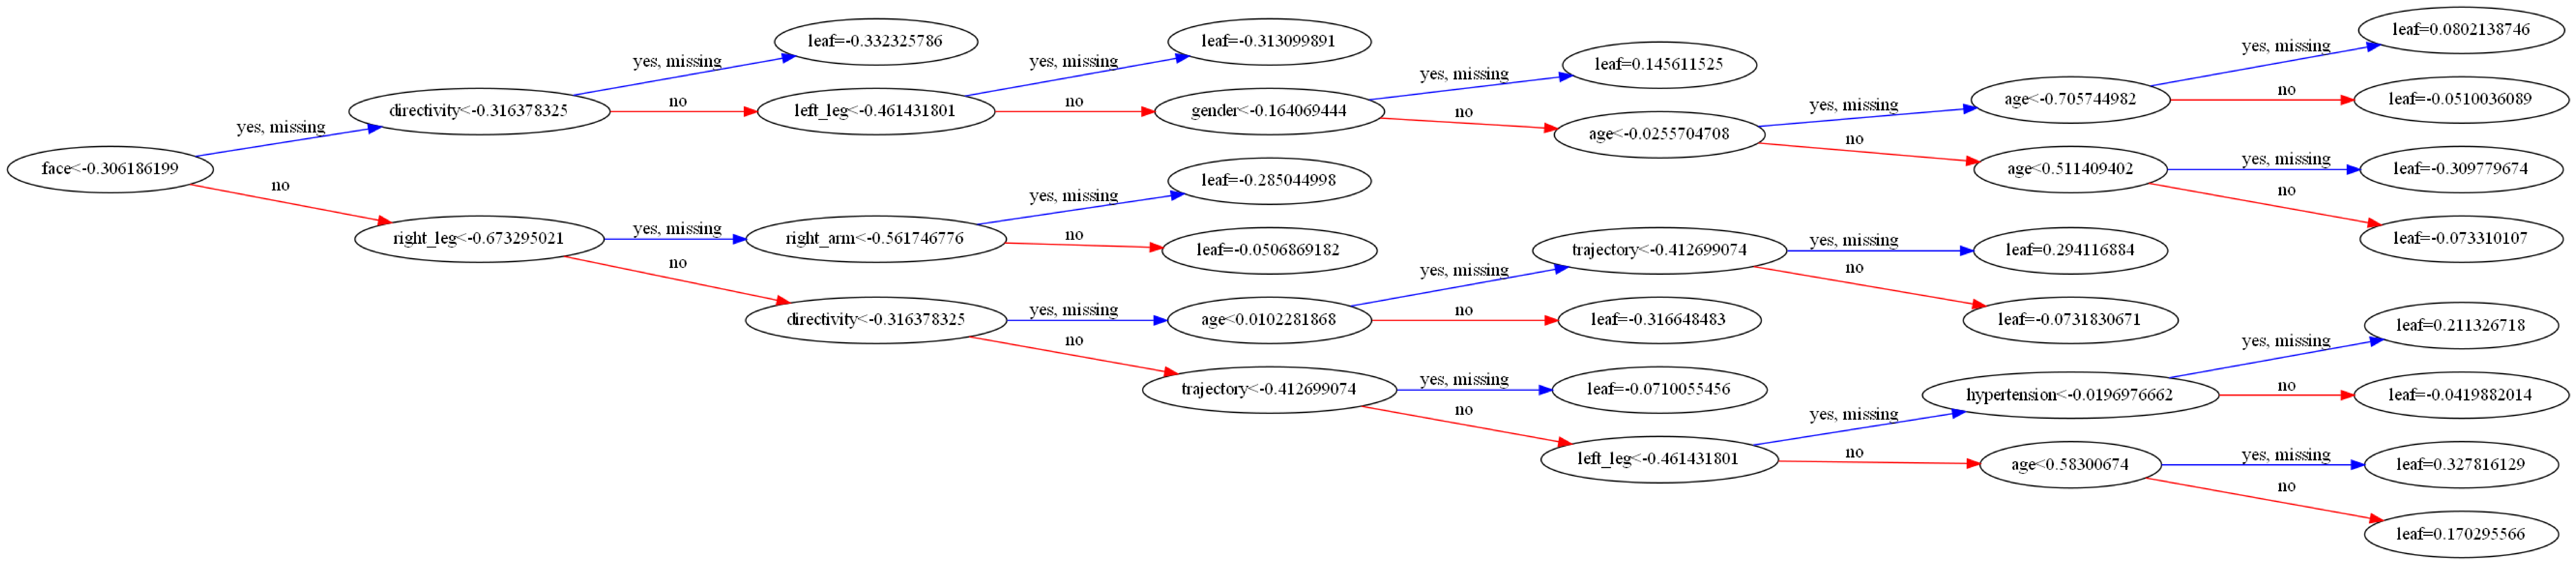

In [207]:
from xgboost import plot_tree, to_graphviz
import matplotlib.pyplot as plt

plot_tree(xg, num_trees=2, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(150, 100)


# Predictions

In [210]:
preds = predict_model(xg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8778,0.9348,0.8889,0.8696,0.8791,0.7556,0.7557


In [211]:
preds

,age,gender,left_arm,right_arm,face,directivity,trajectory,left_leg,right_leg,hypertension,labels,prediction_label,prediction_score
228,31,0,2,1,2,1,1,2,1,1,0,0,0.8709
128,47,0,2,2,2,2,2,2,2,2,1,1,0.9985
215,31,1,1,2,2,2,2,2,2,1,1,1,0.8984
119,70,0,2,1,2,1,1,2,0,2,0,0,0.9790
67,41,1,2,2,2,1,1,2,2,2,1,1,0.9731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,56,0,2,2,2,2,2,2,2,0,1,1,0.9990
81,53,1,2,2,2,1,2,2,2,2,0,0,0.9982
121,50,1,1,2,2,1,1,1,2,2,0,0,0.9943
140,65,1,2,2,1,2,2,2,2,2,0,0,0.9889


# ROC Curve


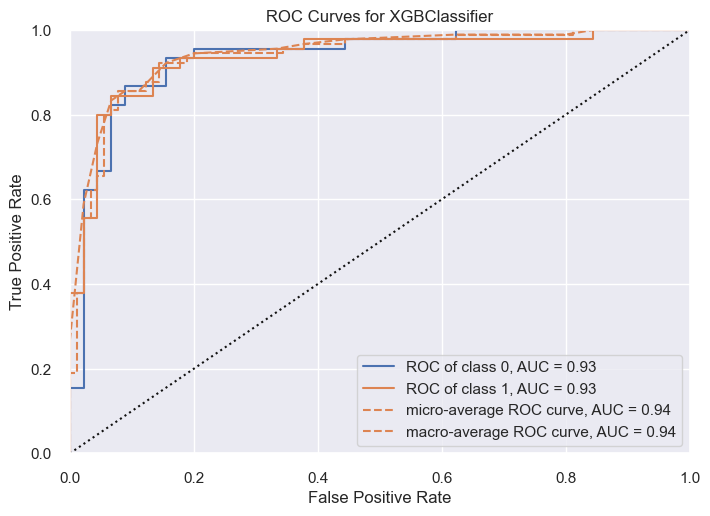

In [212]:
sns.set(font_scale=1)
plot_model(xg)

# Error Plot

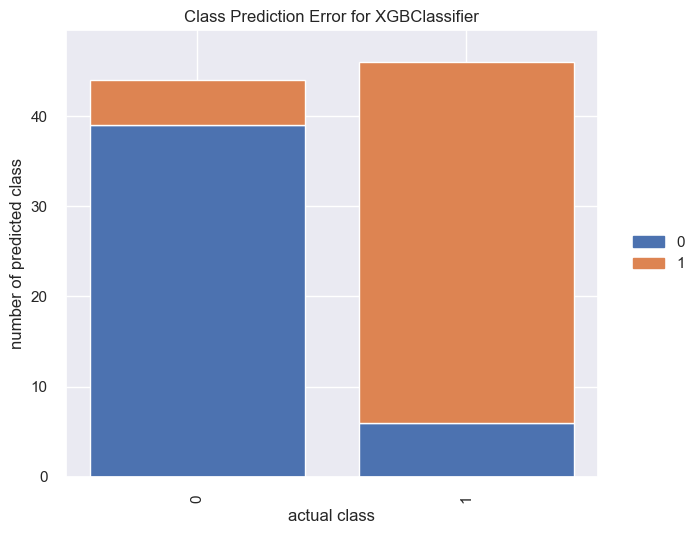

In [213]:
plot_model(xg, plot = 'error')

# Learning Curve

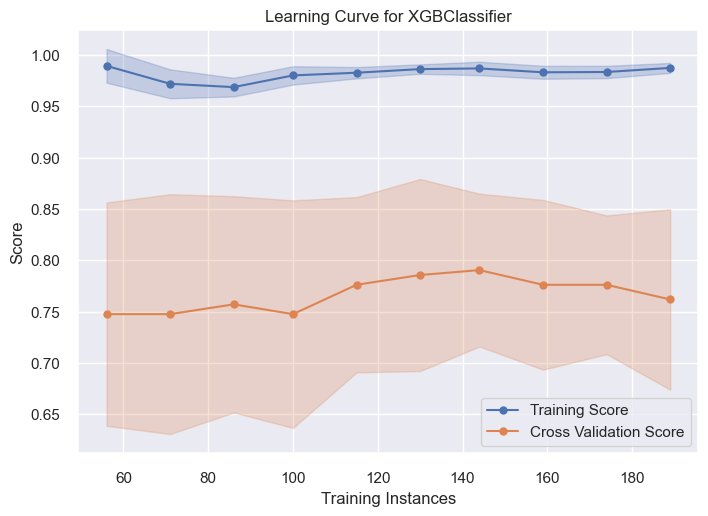

In [214]:
plot_model(xg, plot = 'learning')

# Validation Curve

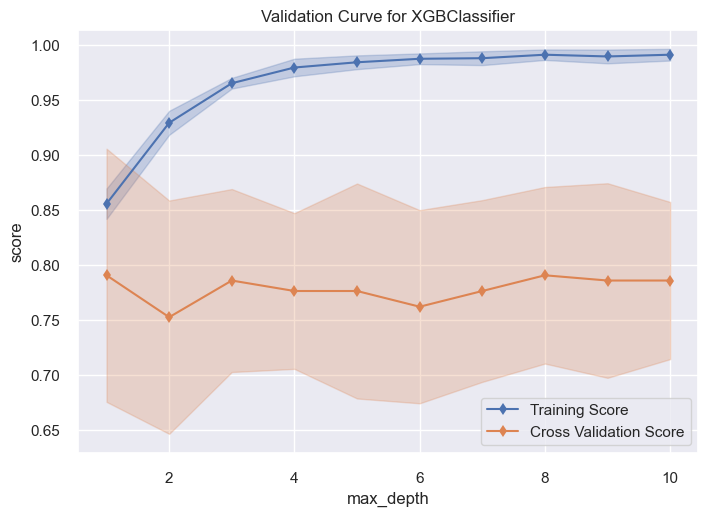

In [215]:
plot_model(xg, plot = 'vc')

# Thank You!

---
